In [99]:
# import the required libraries 
# Quantum Machine Learning (QML) Application using IBM Quantum Qiskit ML environment 
# https://qiskit-community.github.io/qiskit-machine-learning/
# https://qiskit-community.github.io/qiskit-machine-learning/tutorials/index.html
# Quantum Support Vector Classifire (QSVM)
# Qiskit Machine Learning verson:  0.7.2 
# Earth Observational (EO) data obtained from NASA Giovanni tool


In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
import netCDF4

In [131]:
#import netCDF4
#file2read = netCDF4.Dataset('Downloads/g4.timeAvgMap.M2TMNXLND_5_12_4_GWETTOP.20160501-20211031.74W_43N_73W_44N.nc','r')
#var1 = file2read.variables['var1']  # access a variable in the file

In [2]:
import netCDF4
# importing Total Precipitation data downloaded as netCDF4 data from NASA Giovanni to our notebook environment.

file2read_1 = netCDF4.Dataset('Downloads/g4.timeAvgMap.M2TMNXFLX_5_12_4_PRECTOT.20160501-20211031.180W_90S_180E_90N.nc','r')
#var1 = file2read.variables['var1']  # access a variable in the file

In [3]:
file2read_1.variables.keys()

dict_keys(['M2TMNXFLX_5_12_4_PRECTOT', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'shape_mask'])

In [6]:
# Now we import the soil moisture data downloaded as netCDF4 data from NASA Giovanni to our notebook environment.


In [4]:
import netCDF4
file2read_2 = netCDF4.Dataset('Downloads/g4.timeAvgMap.M2TMNXLND_5_12_4_GWETTOP.20160501-20211031.180W_90S_180E_90N.nc','r')
#var1 = file2read.variables['var1']  # access a variable in the file

In [5]:
file2read_2.variables.keys()

dict_keys(['M2TMNXLND_5_12_4_GWETTOP', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'shape_mask'])

In [9]:
#  Soil Temperature
# Now we import the soil temperature data downloaded as netCDF4 data from NASA Giovanni to our notebook environment.

In [6]:
import netCDF4
file2read_3 = netCDF4.Dataset('Downloads/g4.timeAvgMap.M2TMNXLND_5_12_4_TSOIL1.20160501-20211031.180W_90S_180E_90N.nc','r')
#var1 = file2read.variables['var1']  # access a variable in the file

In [7]:
file2read_3.variables.keys()

dict_keys(['M2TMNXLND_5_12_4_TSOIL1', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'shape_mask'])

In [12]:
#file2read.variables.keys()

In [13]:
#precip = file2read.variables['M2TMNXFLX_5_12_4_PRECTOT']  # access a variable in the file

In [14]:
#precip

In [9]:
# Preciipitation total
PRECTOT = file2read_1.variables['M2TMNXFLX_5_12_4_PRECTOT']  # access a variable in the file

In [10]:
# Soil Moisture
GWETTOP = file2read_2.variables['M2TMNXLND_5_12_4_GWETTOP']  # access a variable in the file

In [11]:
# Soil Temperature
TSOIL1 = file2read_3.variables['M2TMNXLND_5_12_4_TSOIL1']  # access a variable in the file

In [12]:
import numpy as np
PRECTOTvalue = PRECTOT[:]


In [13]:
PRECTOTvalue = np.ravel(PRECTOTvalue)
PRECTOTvalue = np.expand_dims(PRECTOTvalue, axis = 1)

In [14]:
import numpy as np
GWETTOPvalue = GWETTOP[:]


In [15]:
GWETTOPvalue = np.ravel(GWETTOPvalue)
GWETTOPvalue = np.expand_dims(GWETTOPvalue, axis = 1)

In [16]:
import numpy as np
TSOIL1value = TSOIL1[:]


In [17]:
TSOIL1value = np.ravel(TSOIL1value)
TSOIL1value = np.expand_dims(TSOIL1value, axis = 1)

In [18]:
import numpy as np

In [19]:
data = np.concatenate((PRECTOTvalue,GWETTOPvalue,TSOIL1value),axis=1)
# rows, and 3 coloumns

In [20]:
#data
data = np.ma.getdata(data)

In [21]:
#value
data

array([[1.e+15, 1.e+15, 1.e+15],
       [1.e+15, 1.e+15, 1.e+15],
       [1.e+15, 1.e+15, 1.e+15],
       ...,
       [1.e+15, 1.e+15, 1.e+15],
       [1.e+15, 1.e+15, 1.e+15],
       [1.e+15, 1.e+15, 1.e+15]], dtype=float32)

In [22]:

data = data[data[:,-1] < 1000]

In [23]:
print(np.shape(data))
# 261 rows means 261 data pints, two features and one target variable (label) 
# labels are: "1" and "0" 
# "1" above frosting
# "0" below frosting

(261, 3)


In [24]:
x = data[:,0:2]
y = data[:,2]

In [25]:
x

array([[1.76773192e-05, 5.10758042e-01],
       [1.91692416e-05, 3.99134606e-01],
       [2.41468169e-05, 3.86678219e-01],
       [2.70575183e-05, 6.45562351e-01],
       [1.79484014e-05, 4.44676876e-01],
       [1.97909230e-05, 4.04459953e-01],
       [2.04177395e-05, 3.69230926e-01],
       [2.34645468e-05, 3.67150068e-01],
       [1.97716618e-05, 4.56732571e-01],
       [2.21577884e-05, 4.01841551e-01],
       [2.32085076e-05, 3.36950600e-01],
       [2.44258281e-05, 3.52499843e-01],
       [1.67435301e-05, 3.90118062e-01],
       [2.02477459e-05, 4.84016180e-01],
       [2.46245709e-05, 4.92726892e-01],
       [2.68115637e-05, 5.16360581e-01],
       [2.73668393e-05, 5.88134944e-01],
       [2.62365647e-05, 6.82895064e-01],
       [1.66604077e-05, 4.73988622e-01],
       [1.91290383e-05, 5.13499796e-01],
       [2.39861693e-05, 5.05626023e-01],
       [2.81657667e-05, 5.23998320e-01],
       [2.88870724e-05, 6.01948977e-01],
       [3.04247915e-05, 7.27454305e-01],
       [3.004649

In [26]:
y

array([299.03296, 298.92065, 299.0199 , 298.51028, 299.119  , 298.91068,
       298.7218 , 298.62695, 298.88602, 298.2073 , 298.2492 , 298.04547,
       298.70038, 298.30313, 297.47998, 297.4213 , 297.62793, 297.51913,
       298.23535, 298.08704, 297.3843 , 296.97824, 297.18625, 296.8405 ,
       296.37766, 297.44757, 297.82904, 297.58304, 297.1675 , 296.5411 ,
       296.6273 , 296.39597, 296.24225, 296.1452 , 295.8209 , 296.78476,
       297.13028, 297.101  , 296.74207, 296.28168, 295.9338 , 296.047  ,
       295.85703, 295.63522, 295.3535 , 295.28748, 295.9509 , 295.63763,
       295.43076, 295.6454 , 295.2068 , 296.2219 , 296.66104, 296.0548 ,
       295.37076, 295.2348 , 295.2059 , 295.15714, 295.6931 , 295.29666,
       295.1794 , 295.08163, 295.25702, 295.22742, 295.24542, 294.31882,
       294.10037, 293.46954, 294.26303, 295.6294 , 296.30756, 295.73563,
       294.54312, 293.715  , 293.67685, 293.9142 , 294.5133 , 295.07803,
       294.81494, 294.65488, 294.56522, 294.4759 , 

In [33]:
# convertion of Temperature from Kelvin values to HOT , COLD

In [27]:
# for the simplicity, we label the temperature above 71 'F ( over 295 Kelvin) as Hot == 1
# and the values below that as Cold == 0

# 295 Kelvin is 71.33 Fahrenheit (~ 71 'F)
y = np.where(y > 295, 1, 0)

In [28]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
print(np.shape(y))

(261,)


In [30]:
OnesVal = np.where(y ==1)
print(OnesVal)

ZeroVal = np.where(y ==0)
print(ZeroVal)



(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        69,  70,  71,  77, 108, 129, 130]),)
(array([ 65,  66,  67,  68,  72,  73,  74,  75,  76,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 

In [31]:
print(np.shape(ZeroVal))

(1, 189)


In [32]:
print(np.shape(OnesVal))

(1, 72)


In [33]:
189+72

261

In [36]:
# tain and test data split
# train_features, train_labels

In [34]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels =train_test_split(x,y, test_size = 0.2, random_state = 42)
# X_train, Y_Test, y_train, Y_Test =

In [35]:
test_features

array([[2.97957740e-05, 5.35953164e-01],
       [4.29595093e-05, 6.55136108e-01],
       [1.43540401e-05, 3.63492250e-01],
       [2.60534307e-05, 5.88739455e-01],
       [2.78570533e-05, 5.41794777e-01],
       [1.57149989e-05, 3.73021334e-01],
       [2.17253655e-05, 4.28061068e-01],
       [1.26955129e-05, 2.80674100e-01],
       [2.21577884e-05, 4.01841551e-01],
       [1.49241250e-05, 3.63729209e-01],
       [3.00464908e-05, 9.49010491e-01],
       [1.22535812e-05, 3.47956866e-01],
       [3.17313097e-05, 6.24804556e-01],
       [1.80966927e-05, 3.94594908e-01],
       [1.51146278e-05, 3.65915060e-01],
       [2.40524023e-05, 4.46136355e-01],
       [3.71957576e-05, 5.98605633e-01],
       [2.04177395e-05, 3.69230926e-01],
       [3.54188087e-05, 4.78450805e-01],
       [4.37378658e-05, 6.24461651e-01],
       [3.58946054e-05, 8.22847664e-01],
       [3.98480734e-05, 6.25837564e-01],
       [1.91290383e-05, 5.13499796e-01],
       [3.82780236e-05, 6.80456281e-01],
       [1.866898

In [36]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
# Scale data


scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)



In [37]:
test_features

array([[ 3.67185920e-01,  3.08868557e-01],
       [ 1.47804785e+00,  1.10764527e+00],
       [-9.35911894e-01, -8.46982777e-01],
       [ 5.13768420e-02,  6.62647843e-01],
       [ 2.03581020e-01,  3.48019660e-01],
       [-8.21063280e-01, -7.83117831e-01],
       [-3.13860148e-01, -4.14235711e-01],
       [-1.07587183e+00, -1.40203881e+00],
       [-2.77368814e-01, -5.89961708e-01],
       [-8.87803555e-01, -8.45394671e-01],
       [ 3.88343424e-01,  3.07722259e+00],
       [-1.11316550e+00, -9.51102555e-01],
       [ 5.30521989e-01,  9.04359996e-01],
       [-6.20076776e-01, -6.38529480e-01],
       [-8.71727407e-01, -8.30744863e-01],
       [-1.17486045e-01, -2.93093204e-01],
       [ 9.91656125e-01,  7.28772044e-01],
       [-4.24208134e-01, -8.08521569e-01],
       [ 8.41702819e-01, -7.65183419e-02],
       [ 1.54373181e+00,  9.02061820e-01],
       [ 8.81854415e-01,  2.23166585e+00],
       [ 1.21547985e+00,  9.11283314e-01],
       [-5.32959104e-01,  1.58383712e-01],
       [ 1.

In [41]:
# Classical Machine Learning: SVM

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [40]:
# Linear
svm_model = SVC(kernel = 'linear', C=1)
svm_model.fit(train_features, train_labels)

SVC(C=1, kernel='linear')

In [45]:
# Predict
predictions = svm_model.predict(test_features)

In [46]:
# accuaracy
accuracy = accuracy_score(test_labels,predictions)

In [47]:
print(accuracy)

0.8113207547169812


In [49]:
from sklearn.metrics import classification_report

In [50]:
# Generate classification report
report = classification_report(test_labels, predictions)

# Print the report for VQC
print(report)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        39
           1       0.75      0.43      0.55        14

    accuracy                           0.81        53
   macro avg       0.79      0.69      0.71        53
weighted avg       0.80      0.81      0.79        53



In [51]:
print(np.shape(test_features))

(53, 2)


In [52]:
print(np.shape(train_features))

(208, 2)


In [47]:
#  Quantum Support Vector Machine Classifire (QSVMC) model start here
#  Running on the IBM Qiskit Quantum Simulator. 

In [48]:
# Quantum Computing --> Quantum Machine Learning (QML) 


In [173]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# number of quibts are equal to the number of features. 
# feature_dimension = number of features
# we have two features : PRECTOTvalue,   GWETTOPvalue
# 

# adhoc_dimension = feature dimension
adhoc_dimension = 2
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")
# change the reps= 3 and see the pattern on the plot you drew. 

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

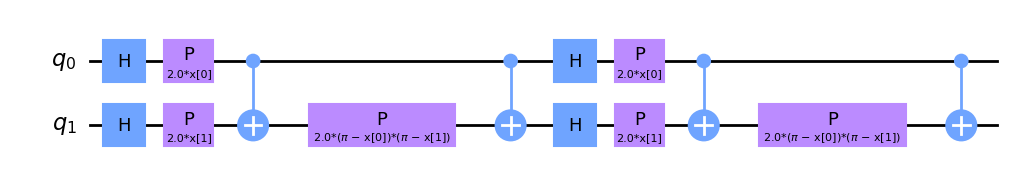

In [174]:
adhoc_feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

In [175]:
import time

In [176]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=adhoc_kernel)

start_score = time.time()

qsvc.fit(train_features, train_labels)

end_score = time.time()
score_time = end_score - start_score 

print(f" time elapse for fitting: {score_time}")

qsvc_score = qsvc.score(test_features, test_labels)


 time elapse for fitting: 55.17653512954712


In [183]:
print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.7547169811320755


In [181]:
# 04/23/ 

# predicting using the test set
c = qsvc.predict(test_features)
print(f"Predicted labels: {predict_test_qsvc}")
print(f"Ground truth:     {test_labels}")


Predicted labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Ground truth:     [1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]


In [182]:
# Generate classification report
report = classification_report(test_labels, predict_test_qsvc)

# Print the report for VQC
print(report)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        39
           1       1.00      0.07      0.13        14

    accuracy                           0.75        53
   macro avg       0.88      0.54      0.50        53
weighted avg       0.82      0.75      0.67        53



In [54]:
import time

In [55]:
start_score = time.time()
qsvc_score = qsvc.score(test_features, test_labels)
end_score = time.time()
score_time = end_score - start_score 

print(f" time elapse for scoring: {score_time}")
print(f"QSVC classification test score: {qsvc_score}")

 time elapse for scoring: 37.28145098686218
QSVC classification test score: 0.7547169811320755


In [56]:
print(test_labels)

[1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]


In [57]:
print(test_features)

[[ 3.67185920e-01  3.08868557e-01]
 [ 1.47804785e+00  1.10764527e+00]
 [-9.35911894e-01 -8.46982777e-01]
 [ 5.13768420e-02  6.62647843e-01]
 [ 2.03581020e-01  3.48019660e-01]
 [-8.21063280e-01 -7.83117831e-01]
 [-3.13860148e-01 -4.14235711e-01]
 [-1.07587183e+00 -1.40203881e+00]
 [-2.77368814e-01 -5.89961708e-01]
 [-8.87803555e-01 -8.45394671e-01]
 [ 3.88343424e-01  3.07722259e+00]
 [-1.11316550e+00 -9.51102555e-01]
 [ 5.30521989e-01  9.04359996e-01]
 [-6.20076776e-01 -6.38529480e-01]
 [-8.71727407e-01 -8.30744863e-01]
 [-1.17486045e-01 -2.93093204e-01]
 [ 9.91656125e-01  7.28772044e-01]
 [-4.24208134e-01 -8.08521569e-01]
 [ 8.41702819e-01 -7.65183419e-02]
 [ 1.54373181e+00  9.02061820e-01]
 [ 8.81854415e-01  2.23166585e+00]
 [ 1.21547985e+00  9.11283314e-01]
 [-5.32959104e-01  1.58383712e-01]
 [ 1.08298647e+00  1.27734375e+00]
 [-5.71782112e-01 -6.97651625e-01]
 [ 7.49009132e-01  1.01678145e+00]
 [ 5.55865645e-01 -7.57145956e-02]
 [ 7.52343476e-01  2.95537496e+00]
 [-1.02517553e-01 -4

In [58]:
# Regular QSVM ends here


In [59]:
# VQC NN applications on Quantum Simulator here starts on here...

In [60]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from qiskit import *
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session,Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

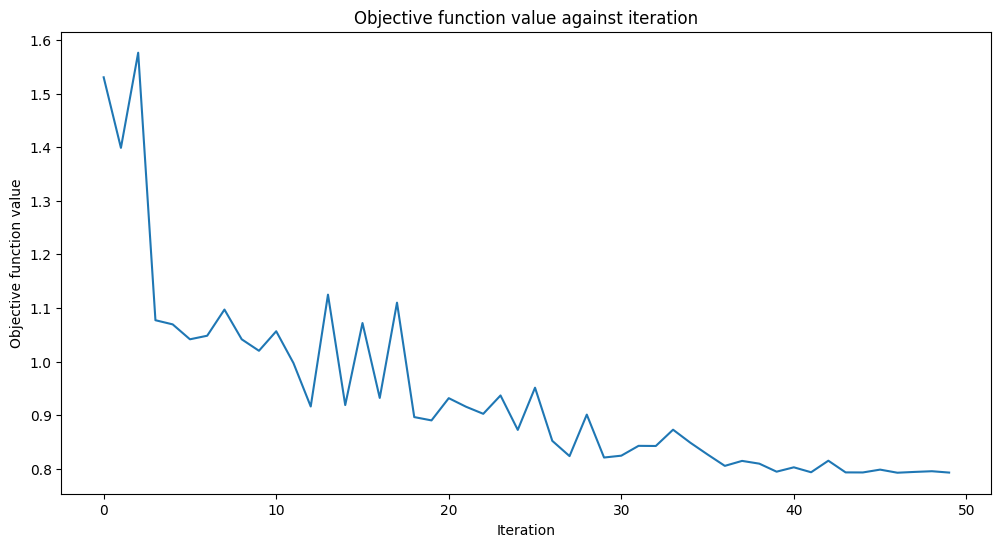

 VQC classification test score: 0.7211538461538461
Predicted labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Ground truth:     [1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]


ModuleNotFoundError: No module named 'torch'

In [64]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
# from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit

algorithm_globals.random_seed = 42
#qc = QNNCircuit(num_qubits=4)
#qc.draw("mpl", style="clifford")
#estimator_qnn = EstimatorQNN(circuit=qc)
#print(X_train.values[0])
#estimator_qnn.forward(X_train.values[0], algorithm_globals.random.random(estimator_qnn.num_weights))


# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


# adhoc_dimension = feature dimension
# adhoc_dimension = 2 = num_qubits = 2 
vqc = VQC(
    num_qubits=2,
    optimizer=COBYLA(maxiter=50),
    callback=callback_graph,
)

    # construct neural network classifier
#estimator_classifier = NeuralNetworkClassifier(
#    estimator_qnn, optimizer=COBYLA(maxiter=60), callback=callback_graph
#)

# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

#y_cat = np.empty(y_train.values.shape, dtype=str)
#y_cat[y_train.values == 0] = "A"
#y_cat[y_train.values == 1] = "B"
#y_cat[y_train.values == 2] = "C"
#print(y_cat)

# fit classifier to data
# train_features, test_features, train_labels, test_labels
# qsvc.fit(train_features, train_labels)

vqc.fit(train_features, train_labels)


# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc_score = vqc.score(train_features,train_labels)

# print training scores


print(f" VQC classification test score: {vqc_score}")

# predicting using the test set
predict_test = vqc.predict(test_features)
print(f"Predicted labels: {predict_test}")
print(f"Ground truth:     {test_labels}")

# evaluate data points
# y_predict =predict

# # plot results
# # red == wrongly classified
# for x, y_target, y_p in zip(X_test.values, y_test.values, y_predict):
#     if y_target == 1:
#         plt.plot(x[0], x[1], "bo")
#     else:
#         plt.plot(x[0], x[1], "go")
#     if y_target != y_p:
#         plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
# plt.plot([-1, 1], [1, -1], "--", color="black")
# plt.show()




In [67]:
from sklearn.metrics import classification_report


# Assuming you have the true labels (y_test) and predicted labels (predicted)
# Convert tensors to numpy arrays
#y_test_np = y_test.values
#predicted_np = predict

# Generate classification report
report = classification_report(test_labels, predict_test)

# Print the report for VQC
print(report)

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        39
           1       0.33      0.07      0.12        14

    accuracy                           0.72        53
   macro avg       0.54      0.51      0.47        53
weighted avg       0.63      0.72      0.64        53



In [ ]:
####### RPI Quantum Computer .. starts here 

In [53]:
from sklearn.preprocessing import MinMaxScaler

from qiskit import *
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session,Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 

# Add your token below
service = QiskitRuntimeService(
    channel="ibm_quantum", token='950eac6ea91bc7d2a525dd515fcfd420117a6d16d6b16cbb7352a155624f4c6f3baaa675eeaf076403d3dc1a60d9a419e2052087c5374bc32322c88b762053c8')

backend = service.backend("ibm_rensselaer") #change to RPI
session = Session(backend=backend)


# Use estimator to get the expected values corresponding to each ansatz
estimator = Estimator(session=session)

# VERIFY:  during debugging optimization_level= 0 

sampler = Sampler(session=session)
pass_manager = generate_preset_pass_manager(optimization_level=3, backend=backend)

In [55]:
#   Train Quantum NN for Giovanni Temperature classificaiton


import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap,ZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import VQC

algorithm_globals.random_seed = 42

# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

num_features=2

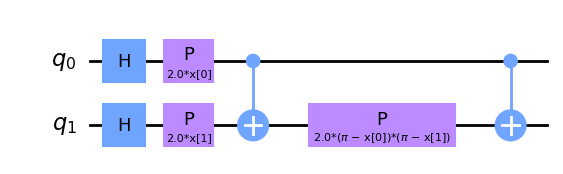

In [78]:
#feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
#feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

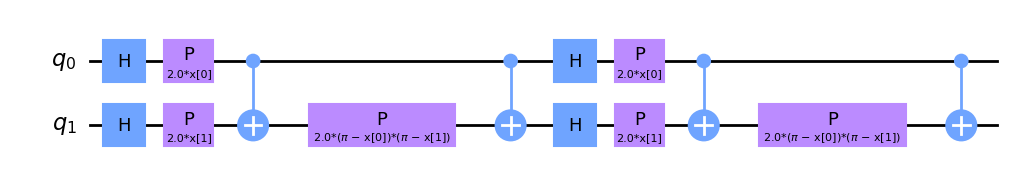

In [56]:
# change to reps= 1 ,,,, reminder
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

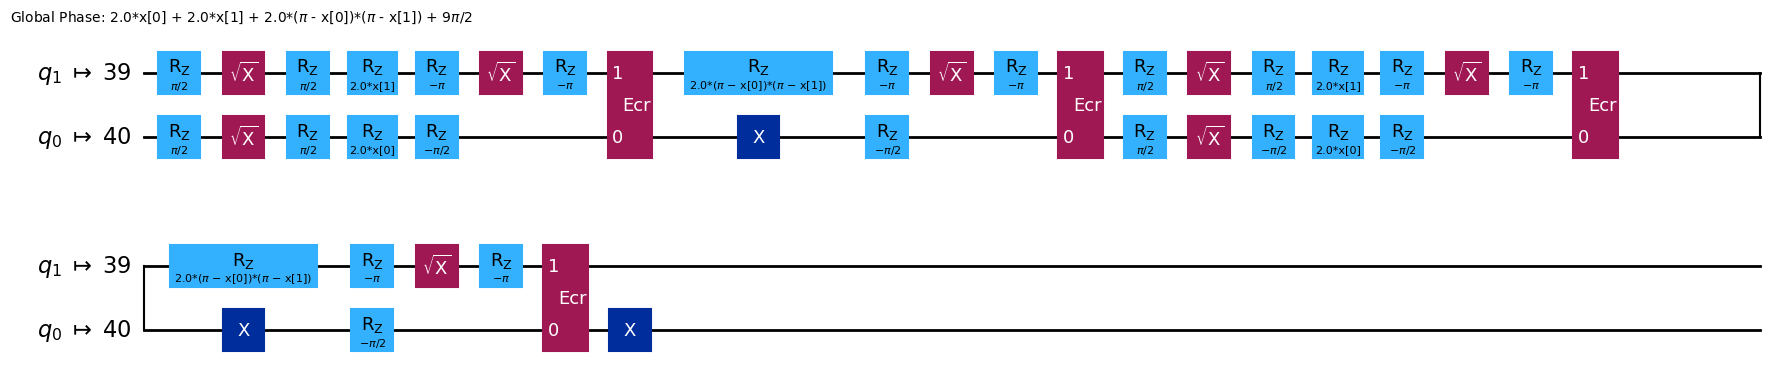

In [57]:
# Transpile it by calling the run method of the pass manager
transpiled = pass_manager.run(feature_map)
 
# Draw it, excluding idle qubits from the diagram
transpiled.draw("mpl", idle_wires=False)

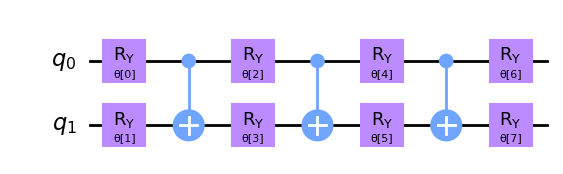

In [58]:
# defining ansatz
#ansatz = RealAmplitudes(num_qubits=4, reps=3)
#ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

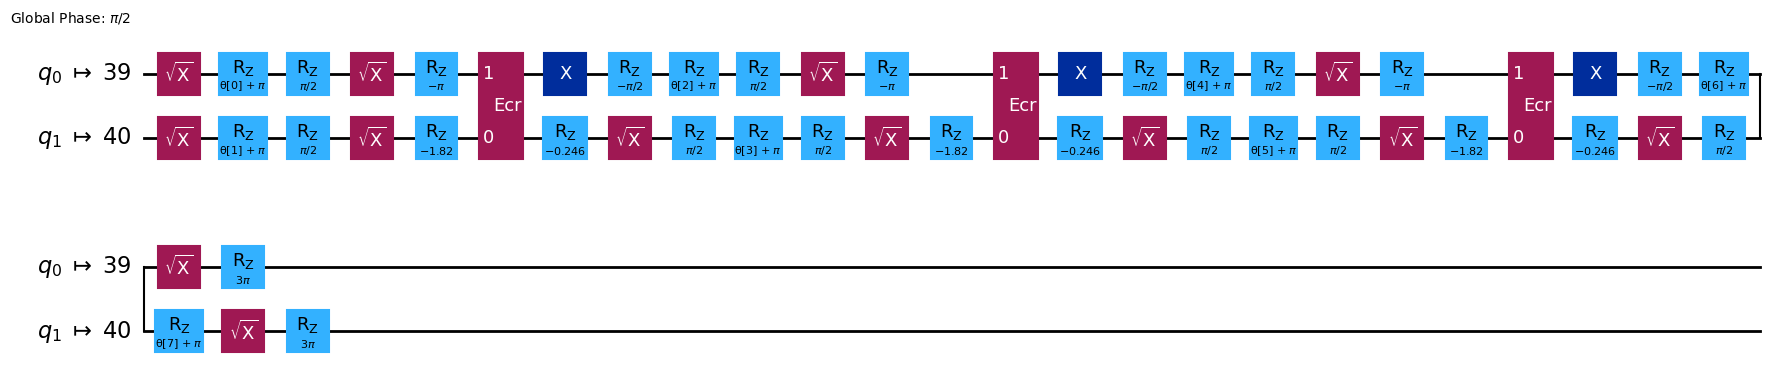

In [59]:
# Transpile it by calling the run method of the pass manager
transpiled_ansatz = pass_manager.run(ansatz)
 
# Draw it, excluding idle qubits from the diagram
transpiled_ansatz.draw("mpl", idle_wires=False)

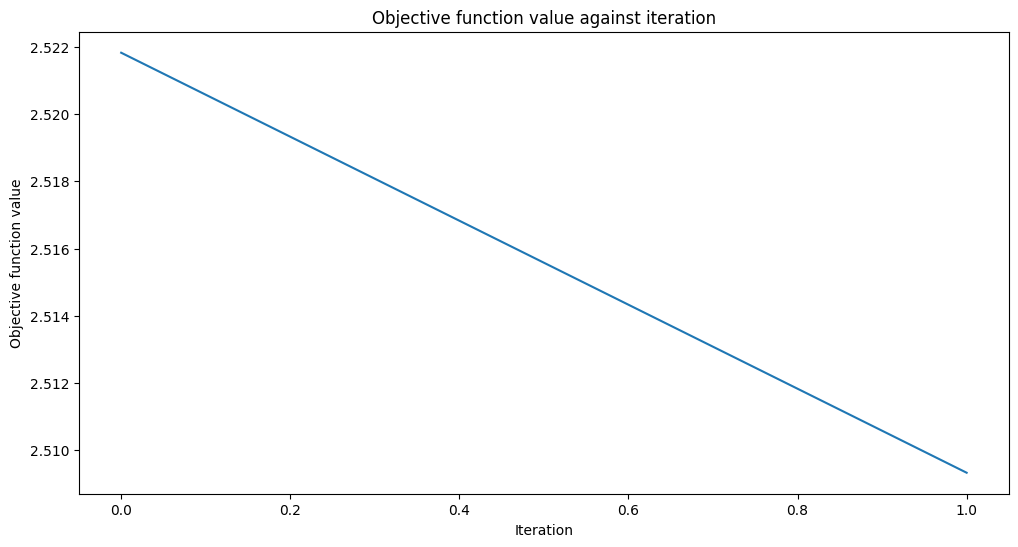

base_runtime_job._start_websocket_client:WARNING:2024-04-28 10:08:19,990: An error occurred while streaming results from the server for job crq5400xet6g008b0ax0:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/QuantumComputing/lib/python3.8/site-packages/qiskit_ibm_runtime/base_runtime_job.py", line 311, in _start_websocket_client
    self._ws_client.job_results()
  File "/opt/anaconda3/envs/QuantumComputing/lib/python3.8/site-packages/qiskit_ibm_runtime/api/clients/runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "/opt/anaconda3/envs/QuantumComputing/lib/python3.8/site-packages/qiskit_ibm_runtime/api/clients/base_websocket_client.py", line 222, in stream
    raise WebsocketError(error_message)
qiskit_ibm_runtime.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection.'

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


QiskitMachineLearningError: 'Sampler job failed.'

In [60]:
# VQC
vqc = VQC(
    sampler=sampler,
    feature_map=transpiled,
    ansatz=transpiled_ansatz,
    optimizer=COBYLA(maxiter=20),
    callback=callback_graph,
)

# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
# vqc=vqc.fit(X_train.values, y_train.values)
vqc=vqc.fit(train_features, train_labels)

In [61]:

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc_score = vqc.score(train_features,train_labels)

# print training scores


print(f" VQC classification test score: {vqc_score}")

# predicting using the test set
predict_test = vqc.predict(test_features)
print(f"Predicted labels: {predict_test}")
print(f"Ground truth:     {test_labels}")





QiskitMachineLearningError: 'The model has not been fitted yet'

In [94]:
from sklearn.metrics import classification_report


# Assuming you have the true labels (y_test) and predicted labels (predicted)
# Convert tensors to numpy arrays
#y_test_np = y_test.values
#predicted_np = predict

# Generate classification report
report = classification_report(test_labels, predict_test)

# Print the report for VQC
print(report)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        39
           1       0.00      0.00      0.00        14

    accuracy                           0.74        53
   macro avg       0.37      0.50      0.42        53
weighted avg       0.54      0.74      0.62        53



/opt/anaconda3/envs/QuantumComputing/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/QuantumComputing/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/QuantumComputing/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le